In [ ]:
Import the necessary libraries.
Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
First look at its main features (head, shape, info).
Rename the columns so they follow the PE8 (snake case).
Change effective to date column to datetime format.
Check NaN values per column.
Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
Get categorical features.
What should we do with the customer_id column?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.style.use('bmh')

In [2]:
data = pd.read_csv('mcva.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.shape

(9134, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
#If needed, standardize header names
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())
data.columns = cols
data.columns = [e.lower().replace(' ','_')for e in data.columns]
data.head()

data.columns = list(map(lambda x: x.lower().replace(" ","_"), data.columns))

In [6]:
# datetime conversion
data['effective_to_date'] =  pd.to_datetime((data['effective_to_date']), errors='coerce')

In [7]:
len(data.columns)

24

In [8]:
# df.count() does not include NaN values
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['Id']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

NameError: name 'df' is not defined

In [ ]:
#7. Store continuous data into a continuous variable and do the same for discrete and categorical.

# Define a function that differentiates between continuous and discrete variables. 
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)

In [ ]:
'''
8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
9. Get categorical features.

8/9 - For real?? I am getting hung up on whether we are being asked to repeat what we have already completed in an earlier lab.
8/9 - (cont) When I have the switch "Can I do this?" already set to yes before I begin, why would I try? It's just repetition.
8/9 - (cont) Is the learning objective 'solidify past knowledge' or 'learn something new'?
8/9 - Give us a new dataset to clean, something I can look


9What should we do with the customer_id column?

We drop the customer_id column because it, as a unique identifier, cannot be correlated to anything. This was literally part of

'''

In [ ]:
data.customer_lifetime_value.hist(bins = 400)

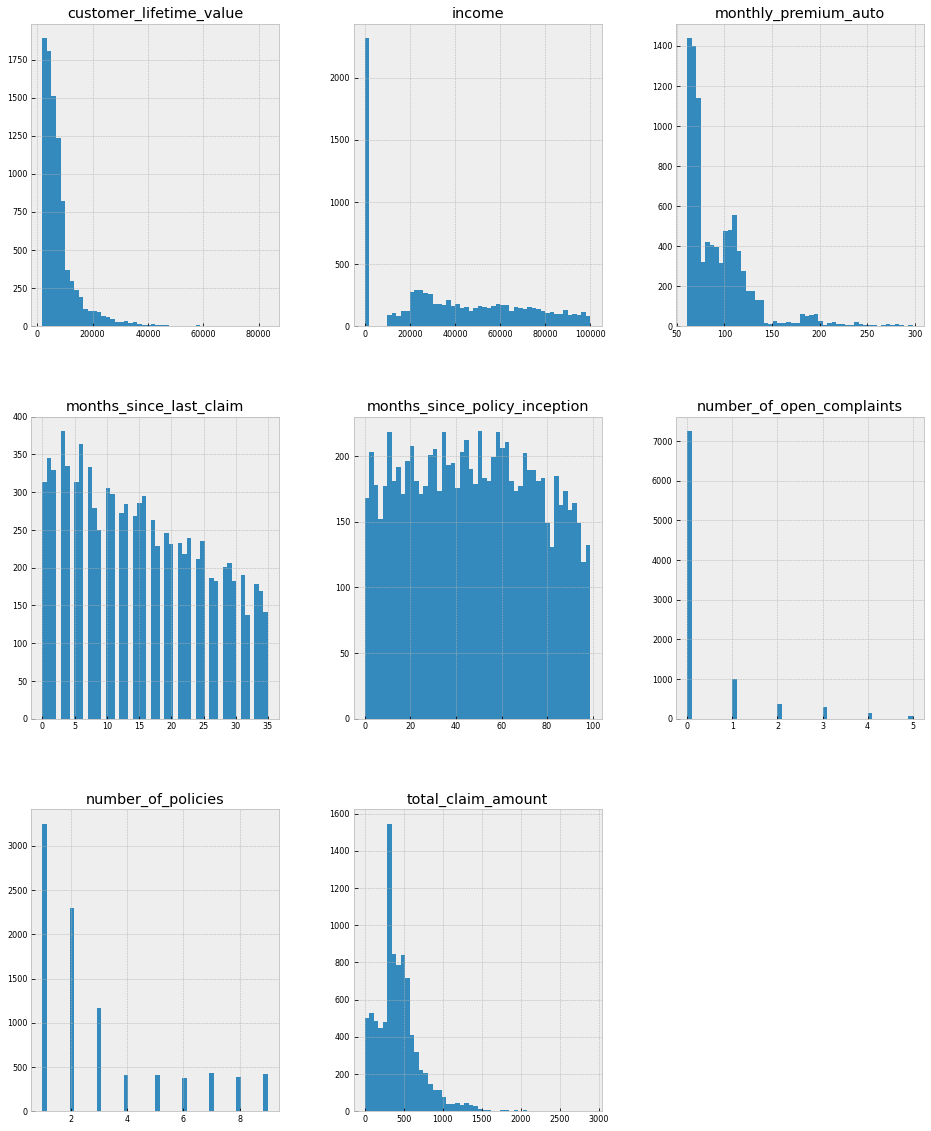

In [9]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [10]:
#Load the continuous and discrete variables into continuous_df and discrete_df variables.

X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)

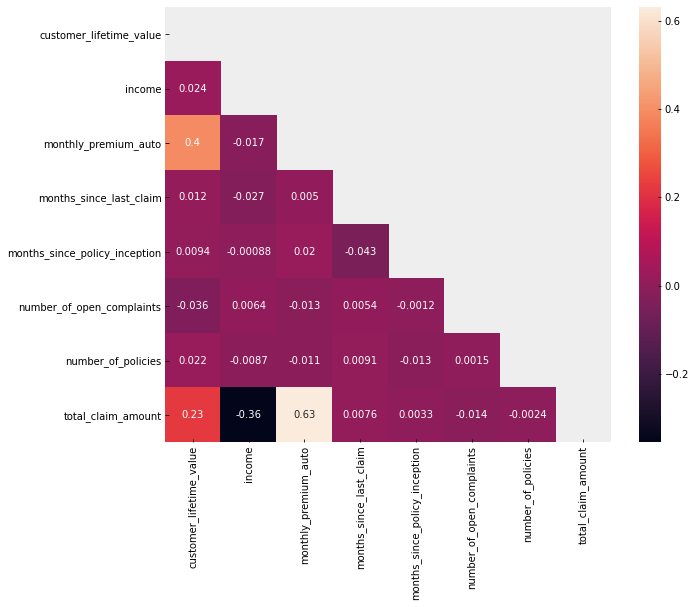

In [11]:
#Using a Correlations Matrix to Check for 

correlations_matrix = X_num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [12]:
summary = data.describe().T
summary['iqr'] = summary['75%']-summary['25%']
summary['mean'] = list(map(lambda x: round(x,2), summary['mean']))
summary

,count,mean,std,min,25%,50%,75%,max,iqr
customer_lifetime_value,9134.0,8004.94,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190,4967.915247
income,9134.0,37657.38,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000,62320.000000
monthly_premium_auto,9134.0,93.22,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000,41.000000
months_since_last_claim,9134.0,15.10,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000,17.000000
months_since_policy_inception,9134.0,48.06,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000,47.000000
number_of_open_complaints,9134.0,0.38,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
number_of_policies,9134.0,2.97,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000,3.000000
total_claim_amount,9134.0,434.09,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678,275.256594


In [13]:
from scipy import stats
X_num_outliersremoved = X_num[(np.abs(stats.zscore(X_num)) < 3).all(axis=1)]
X_num_outliersremoved.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [33]:
#The rest of the lab is repeated from the last lab and I have mentioned this in detailed feedback to the curriculum team, and my answers can be found above as commentary.

In [ ]:
#Lab 3

'''
1.Open the categoricals variable we created before.
categoricals = data.select_dtypes(np.object)
categoricals.head()
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?'''

In [14]:
X_cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [ ]:
data = sns.load_dataset("data")
sns.catplot(x="day", y="total_bill", data=data)